In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from IPython.display import Image
import numpy as np 
import pandas as pd

from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import *
from keras.optimizers import SGD , Adam
from keras.callbacks import ModelCheckpoint

import os
import scipy.io
import numpy
import h5py

Using TensorFlow backend.


In [ ]:
from google.colab import files
files.upload()

Saving 00010.jpg to 00010.jpg


{'00010.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x08\x05\x06\x07\x06\x05\x08\x07\x06\x07\t\x08\x08\t\x0c\x13\x0c\x0c\x0b\x0b\x0c\x18\x11\x12\x0e\x13\x1c\x18\x1d\x1d\x1b\x18\x1b\x1a\x1f#,%\x1f!*!\x1a\x1b&4\'*./121\x1e%6:60:,010\xff\xdb\x00C\x01\x08\t\t\x0c\n\x0c\x17\x0c\x0c\x170 \x1b 00000000000000000000000000000000000000000000000000\xff\xc0\x00\x11\x08\x00\xc2\x01\x03\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00O\x10\x00\x01\x02\x04\x02\x05\x06\t\t\x07\x03\x03\x02\x07\x00\x00\x02\x01\x03\x00\x04\x11\x12\x05!\x06\x13"12ABQRa\x91\x07\x14#bqr\x81\x92\xa1\x15$3S\x82\xb1\xc1\xd1\xf04CDc\x83\xa2\xe1\x16T\xf1\x17%s\x94\xa3EUd\x93\xb2\xc2\xf2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00/\x11\x00\x02\x02\x01\x03\x03\x03\x03\x03\x04\x03\x01\x00\x00\x00\x

In [ ]:
!mv sample_data/inceptionV3_weights1.h5 content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip drive/'My Drive'/car_data.zip

Archive:  drive/My Drive/car_data.zip
   creating: car_data/
   creating: car_data/test/
   creating: car_data/test/Acura Integra Type R 2001/
  inflating: car_data/test/Acura Integra Type R 2001/00128.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/00130.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/00386.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/00565.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/00711.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/01002.jpg  
 extracting: car_data/test/Acura Integra Type R 2001/01035.jpg  
 extracting: car_data/test/Acura Integra Type R 2001/01176.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/01326.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/01864.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/02011.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/02182.jpg  
  inflating: car_data/test/Acura Integra Type R 2001/02425.jpg  
  inflating:

In [ ]:
mat = scipy.io.loadmat('cars_meta.mat')
num_classes = 196
cars_name_list = []
mat = mat['class_names']
for i in range(num_classes):
    cars_name_list.append(mat[0, i].tolist())
    
car_name_train = {}
for i in range (196):
    car_name_train[i + 1] = cars_name_list[i]
    
print(car_name_train)
print(cars_name_list)

{1: ['AM General Hummer SUV 2000'], 2: ['Acura RL Sedan 2012'], 3: ['Acura TL Sedan 2012'], 4: ['Acura TL Type-S 2008'], 5: ['Acura TSX Sedan 2012'], 6: ['Acura Integra Type R 2001'], 7: ['Acura ZDX Hatchback 2012'], 8: ['Aston Martin V8 Vantage Convertible 2012'], 9: ['Aston Martin V8 Vantage Coupe 2012'], 10: ['Aston Martin Virage Convertible 2012'], 11: ['Aston Martin Virage Coupe 2012'], 12: ['Audi RS 4 Convertible 2008'], 13: ['Audi A5 Coupe 2012'], 14: ['Audi TTS Coupe 2012'], 15: ['Audi R8 Coupe 2012'], 16: ['Audi V8 Sedan 1994'], 17: ['Audi 100 Sedan 1994'], 18: ['Audi 100 Wagon 1994'], 19: ['Audi TT Hatchback 2011'], 20: ['Audi S6 Sedan 2011'], 21: ['Audi S5 Convertible 2012'], 22: ['Audi S5 Coupe 2012'], 23: ['Audi S4 Sedan 2012'], 24: ['Audi S4 Sedan 2007'], 25: ['Audi TT RS Coupe 2012'], 26: ['BMW ActiveHybrid 5 Sedan 2012'], 27: ['BMW 1 Series Convertible 2012'], 28: ['BMW 1 Series Coupe 2012'], 29: ['BMW 3 Series Sedan 2012'], 30: ['BMW 3 Series Wagon 2012'], 31: ['BMW 6 

In [ ]:
height = 299
width = 299

inceptionV3 = InceptionV3(weights = 'imagenet',
                          include_top = False,
                          pooling = 'avg',
                          input_shape = (height , width , 3))

inceptionV3.trainable = True

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
inceptionV3.summary()

In [ ]:
trainable = False
for layer in inceptionV3.layers:
    if layer.name == 'conv2d_73':
        trainable = True
    layer.trainable = trainable

In [ ]:
model = Sequential()
model.add(inceptionV3)
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(196))
model.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
activation_95 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 196)               200900    
_________________________________________________________________
activation_96 (Activation)   (None, 196)               0         
Total params: 24,101,860
Trainable params: 15,110,980
Non-trainable params: 8,990,880
________________________________________________________

In [ ]:
!cp drive/'My Drive'/last_experiment.h5 weights.h5

In [ ]:
!cp inceptionV3_experiment6.h5 drive/'My Drive'/last_experiment.h5

In [ ]:
model.load_weights('weights.h5')

In [ ]:
from __future__ import print_function
from __future__ import absolute_import

from keras.preprocessing import image

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cutout(img):
    MAX_CUTS = 5
    MAX_LENGTH_MULTIPLIER = 10

    height = img.shape[1]
    width = img.shape[2]

    # normalize before adding the mask
    mean = img.mean(keepdims=True)
    img -= mean

    mask = np.ones((height, width), np.float32)
    nb_cuts = np.random.randint(1, MAX_CUTS + 1)

    for i in range(nb_cuts):
        y = np.random.randint(height)
        x = np.random.randint(width)
        length = 4 * np.random.randint(1, MAX_LENGTH_MULTIPLIER + 1)

        y1 = np.clip(y - length // 2, 0, height)
        y2 = np.clip(y + length // 2, 0, height)
        x1 = np.clip(x - length // 2, 0, width)
        x2 = np.clip(x + length // 2, 0, width)

        mask[y1: y2, x1: x2] = 0.

    # apply mask
    img = img * mask

    # denormalize
    img += mean

    return img

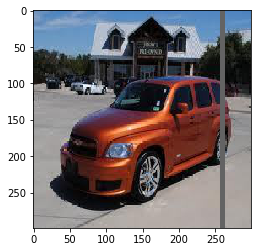

In [ ]:
img_path = '00010.jpg'
img = image.load_img(img_path, target_size=(299, 299))
def cut(img):
    x = image.img_to_array(img)
    x = (x / 255.0).astype('float32')
    
    x = cutout(x)

    return x
    
plt.imshow(cut(img))
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                preprocessing_function = cut,
                shear_range = 0.2,
                zoom_range = 0.2,
                rotation_range = 90,
                width_shift_range=0.2,
                height_shift_range=0.2,
                horizontal_flip = True,
                vertical_flip = False
                )

val_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
val_path = 'car_data/test'
val_generator = val_datagen.flow_from_directory(val_path,
                                                target_size = (height , width),
                                                batch_size = 80,
                                                shuffle = False,
                                                class_mode = 'categorical')


Found 8041 images belonging to 196 classes.


In [ ]:
train_path = 'car_data/train'
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size = (height , width),
                                                    batch_size = 80,
                                                    class_mode = 'categorical')

Found 8144 images belonging to 196 classes.


In [ ]:
from keras.metrics import top_k_categorical_accuracy
def top_3_acc(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=3)
  
def top_5_acc(y_true, y_pred):
    return top_k_categorical_accuracy(y_true, y_pred, k=5)
  
epochs = 10
batch_size = 80
num_train_images = 8144

adam = Adam(lr = 0.00001)
model.compile(adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
filepath = 'inceptionV3_experiment6.h5'
checkpoint = ModelCheckpoint(filepath, monitor = ['acc'] , verbose = 1  , mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
new_history1 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 60,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
!cp inceptionV3_experiment6.h5 drive/'My Drive'/new_time.h5

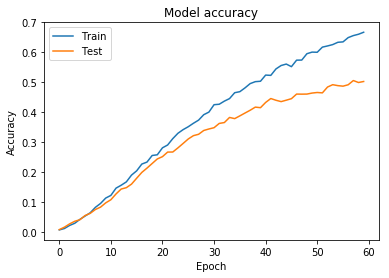

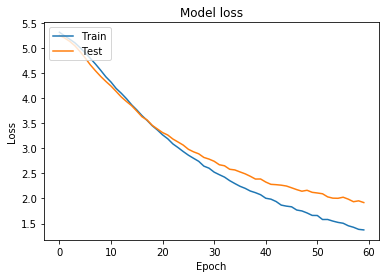

In [ ]:
# Plot training & validation accuracy values
plt.plot(new_history1.history['acc'])
plt.plot(new_history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(new_history1.history['loss'])
plt.plot(new_history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
new_history2 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 20,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
new_history3 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
new_history3 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
!cp inceptionV3_experiment6.h5 drive/'My Drive'/new_time.h5

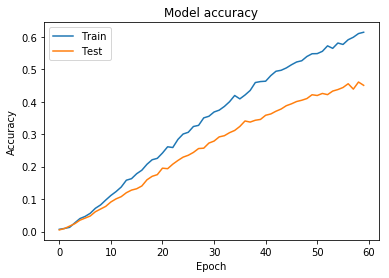

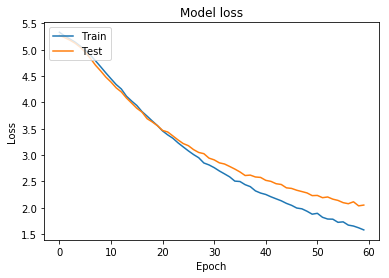

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
!cp inceptionV3_experiment6.h5 drive/'My Drive'/course_experiment.h5

In [ ]:
new_history4 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
new_history5 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 248s 2s/step - loss: 1.3211 - acc: 0.6617 - val_loss: 1.3833 - val_acc: 0.6217

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/10
101/101 [==============================] - 230s 2s/step - loss: 1.2860 - acc: 0.6758 - val_loss: 1.3618 - val_acc: 0.6291

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/10
101/101 [==============================] - 228s 2s/step - loss: 1.2769 - acc: 0.6836 - val_loss: 1.3789 - val_acc: 0.6248

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/10
101/101 [==============================] - 225s 2s/step - loss: 1.2837 - acc: 0.6749 - val_loss: 1.3602 - val_acc: 0.6273

Epoch 00004: saving model to inceptionV3_experiment6.h5
Epoch 5/10
101/101 [==============================] - 223s 2s/step - loss: 1.2436 - acc: 0.6812 - val_loss: 1.3509 - val_acc: 0.6311

Epoch 00005: saving model to inceptionV3_experiment6.h5
Epoch 6/10
101/101 [==============================

In [ ]:
new_history6 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 247s 2s/step - loss: 1.4711 - acc: 0.6277 - val_loss: 1.3175 - val_acc: 0.6375

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/10
101/101 [==============================] - 222s 2s/step - loss: 1.4141 - acc: 0.6491 - val_loss: 1.3050 - val_acc: 0.6374

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/10
101/101 [==============================] - 220s 2s/step - loss: 1.4349 - acc: 0.6469 - val_loss: 1.3137 - val_acc: 0.6376

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/10
101/101 [==============================] - 220s 2s/step - loss: 1.4202 - acc: 0.6403 - val_loss: 1.3214 - val_acc: 0.6347

Epoch 00004: saving model to inceptionV3_experiment6.h5
Epoch 5/10
101/101 [==============================] - 223s 2s/step - loss: 1.3954 - acc: 0.6493 - val_loss: 1.3415 - val_acc: 0.6288

Epoch 00005: saving model to inceptionV3_experiment6.h5
Epoch 6/10
101/101 [==============================

In [ ]:
new_history7 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 244s 2s/step - loss: 1.3268 - acc: 0.6642 - val_loss: 1.3075 - val_acc: 0.6361

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/10
101/101 [==============================] - 225s 2s/step - loss: 1.2961 - acc: 0.6726 - val_loss: 1.2931 - val_acc: 0.6430

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/10
101/101 [==============================] - 226s 2s/step - loss: 1.3095 - acc: 0.6730 - val_loss: 1.3037 - val_acc: 0.6384

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/10
101/101 [==============================] - 223s 2s/step - loss: 1.3031 - acc: 0.6739 - val_loss: 1.3228 - val_acc: 0.6369

Epoch 00004: saving model to inceptionV3_experiment6.h5
Epoch 5/10
101/101 [==============================] - 230s 2s/step - loss: 1.3131 - acc: 0.6657 - val_loss: 1.2979 - val_acc: 0.6415

Epoch 00005: saving model to inceptionV3_experiment6.h5
Epoch 6/10
101/101 [==============================

In [ ]:
new_history8 = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 250s 2s/step - loss: 1.2345 - acc: 0.6843 - val_loss: 1.2930 - val_acc: 0.6411

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/10
101/101 [==============================] - 227s 2s/step - loss: 1.2152 - acc: 0.6919 - val_loss: 1.2890 - val_acc: 0.6415

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/10
101/101 [==============================] - 226s 2s/step - loss: 1.1936 - acc: 0.6976 - val_loss: 1.2866 - val_acc: 0.6439

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/10
101/101 [==============================] - 223s 2s/step - loss: 1.2000 - acc: 0.6898 - val_loss: 1.3037 - val_acc: 0.6413

Epoch 00004: saving model to inceptionV3_experiment6.h5
Epoch 5/10
101/101 [==============================] - 224s 2s/step - loss: 1.1737 - acc: 0.7047 - val_loss: 1.2840 - val_acc: 0.6465

Epoch 00005: saving model to inceptionV3_experiment6.h5
Epoch 6/10
101/101 [==============================

In [ ]:
acc = new_history1.history['acc'] + new_history2.history['acc'] + new_history3.history['acc'] + new_history4.history['acc'] + new_history5.history['acc'] + new_history6.history['acc'] + new_history7.history['acc']

val_acc = new_history1.history['val_acc'] + new_history2.history['val_acc'] + new_history3.history['val_acc'] + new_history4.history['val_acc'] + new_history5.history['val_acc'] + new_history6.history['val_acc'] + new_history7.history['val_acc']

loss = new_history1.history['loss'] + new_history2.history['loss'] + new_history3.history['loss'] + new_history4.history['loss'] + new_history5.history['loss'] + new_history6.history['loss'] + new_history7.history['loss']

val_loss = new_history1.history['val_loss'] + new_history2.history['val_loss'] + new_history3.history['val_loss'] + new_history4.history['val_loss'] + new_history5.history['val_loss'] + new_history6.history['val_loss'] + new_history7.history['val_loss']

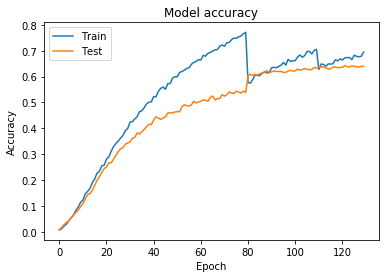

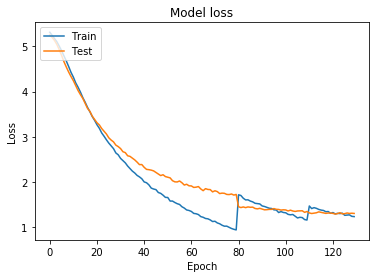

In [ ]:
# Plot training & validation accuracy values
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 263s 3s/step - loss: 0.8464 - acc: 0.7919 - top_3_acc: 0.9155 - top_5_acc: 0.9440 - val_loss: 1.4193 - val_acc: 0.6082 - val_top_3_acc: 0.8220 - val_top_5_acc: 0.8823

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/5
101/101 [==============================] - 228s 2s/step - loss: 0.8145 - acc: 0.7992 - top_3_acc: 0.9196 - top_5_acc: 0.9458 - val_loss: 1.4302 - val_acc: 0.6073 - val_top_3_acc: 0.8202 - val_top_5_acc: 0.8833

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/5
101/101 [==============================] - 235s 2s/step - loss: 0.7994 - acc: 0.8024 - top_3_acc: 0.9189 - top_5_acc: 0.9483 - val_loss: 1.4080 - val_acc: 0.6112 - val_top_3_acc: 0.8250 - val_top_5_acc: 0.8852

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/5
101/101 [==============================] - 235s 2s/step - loss: 0.7765 - acc: 0.8026 - top_3_acc: 0.9234 - top_5_acc: 0.9521 - val_loss: 1.4122 - val_acc: 0.61

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 259s 3s/step - loss: 0.7756 - acc: 0.8073 - top_3_acc: 0.9192 - top_5_acc: 0.9468 - val_loss: 1.4315 - val_acc: 0.6092 - val_top_3_acc: 0.8223 - val_top_5_acc: 0.8841

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/5
101/101 [==============================] - 236s 2s/step - loss: 0.7522 - acc: 0.8118 - top_3_acc: 0.9270 - top_5_acc: 0.9525 - val_loss: 1.4520 - val_acc: 0.6023 - val_top_3_acc: 0.8164 - val_top_5_acc: 0.8795

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/5
101/101 [==============================] - 235s 2s/step - loss: 0.7226 - acc: 0.8158 - top_3_acc: 0.9278 - top_5_acc: 0.9548 - val_loss: 1.4494 - val_acc: 0.6052 - val_top_3_acc: 0.8185 - val_top_5_acc: 0.8804

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/5
101/101 [==============================] - 237s 2s/step - loss: 0.7165 - acc: 0.8157 - top_3_acc: 0.9320 - top_5_acc: 0.9562 - val_loss: 1.4547 - val_acc: 0.60

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 268s 3s/step - loss: 0.6945 - acc: 0.8246 - top_3_acc: 0.9354 - top_5_acc: 0.9596 - val_loss: 1.4321 - val_acc: 0.6071 - val_top_3_acc: 0.8225 - val_top_5_acc: 0.8851

Epoch 00001: saving model to inceptionV3_experiment6.h5
Epoch 2/10
101/101 [==============================] - 235s 2s/step - loss: 0.7164 - acc: 0.8161 - top_3_acc: 0.9277 - top_5_acc: 0.9554 - val_loss: 1.4569 - val_acc: 0.6086 - val_top_3_acc: 0.8180 - val_top_5_acc: 0.8795

Epoch 00002: saving model to inceptionV3_experiment6.h5
Epoch 3/10
101/101 [==============================] - 241s 2s/step - loss: 0.7250 - acc: 0.8153 - top_3_acc: 0.9273 - top_5_acc: 0.9556 - val_loss: 1.4128 - val_acc: 0.6149 - val_top_3_acc: 0.8258 - val_top_5_acc: 0.8854

Epoch 00003: saving model to inceptionV3_experiment6.h5
Epoch 4/10
101/101 [==============================] - 240s 2s/step - loss: 0.6824 - acc: 0.8263 - top_3_acc: 0.9342 - top_5_acc: 0.9588 - val_loss: 1.4261 - val_acc: 

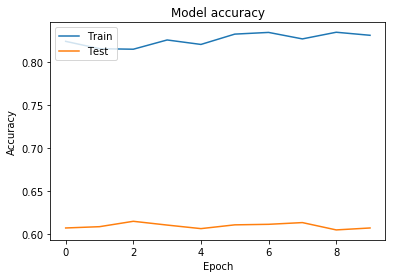

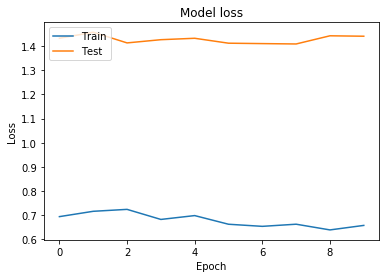

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 251s 2s/step - loss: 0.4043 - acc: 0.9088 - val_loss: 1.9607 - val_acc: 0.4779

Epoch 00001: saving model to inceptionV3_experiment.h5
Epoch 2/5
101/101 [==============================] - 228s 2s/step - loss: 0.3920 - acc: 0.9138 - val_loss: 1.9481 - val_acc: 0.4796

Epoch 00002: saving model to inceptionV3_experiment.h5
Epoch 3/5
101/101 [==============================] - 229s 2s/step - loss: 0.3919 - acc: 0.9117 - val_loss: 1.9381 - val_acc: 0.4852

Epoch 00003: saving model to inceptionV3_experiment.h5
Epoch 4/5
101/101 [==============================] - 229s 2s/step - loss: 0.3913 - acc: 0.9124 - val_loss: 1.9548 - val_acc: 0.4842

Epoch 00004: saving model to inceptionV3_experiment.h5
Epoch 5/5
101/101 [==============================] - 227s 2s/step - loss: 0.3861 - acc: 0.9113 - val_loss: 1.9112 - val_acc: 0.4944

Epoch 00005: saving model to inceptionV3_experiment.h5


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 10,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/10
101/101 [==============================] - 243s 2s/step - loss: 0.3634 - acc: 0.9168 - val_loss: 1.9197 - val_acc: 0.4913

Epoch 00001: saving model to inceptionV3_experiment.h5
Epoch 2/10
101/101 [==============================] - 227s 2s/step - loss: 0.3683 - acc: 0.9206 - val_loss: 1.9520 - val_acc: 0.4855

Epoch 00002: saving model to inceptionV3_experiment.h5
Epoch 3/10
101/101 [==============================] - 225s 2s/step - loss: 0.3487 - acc: 0.9215 - val_loss: 1.9186 - val_acc: 0.4913

Epoch 00003: saving model to inceptionV3_experiment.h5
Epoch 4/10
101/101 [==============================] - 227s 2s/step - loss: 0.3390 - acc: 0.9255 - val_loss: 1.9177 - val_acc: 0.4904

Epoch 00004: saving model to inceptionV3_experiment.h5
Epoch 5/10
101/101 [==============================] - 224s 2s/step - loss: 0.3471 - acc: 0.9255 - val_loss: 1.9072 - val_acc: 0.4972

Epoch 00005: saving model to inceptionV3_experiment.h5
Epoch 6/10
101/101 [==============================] - 2

In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 240s 2s/step - loss: 0.2552 - acc: 0.9468 - val_loss: 1.8690 - val_acc: 0.4993

Epoch 00001: saving model to inceptionV3_experiment.h5
Epoch 2/5
101/101 [==============================] - 217s 2s/step - loss: 0.2450 - acc: 0.9468 - val_loss: 1.8691 - val_acc: 0.5048

Epoch 00002: saving model to inceptionV3_experiment.h5
Epoch 3/5
101/101 [==============================] - 219s 2s/step - loss: 0.2530 - acc: 0.9442 - val_loss: 1.8998 - val_acc: 0.4965

Epoch 00003: saving model to inceptionV3_experiment.h5
Epoch 4/5
101/101 [==============================] - 215s 2s/step - loss: 0.2372 - acc: 0.9472 - val_loss: 1.8851 - val_acc: 0.4996

Epoch 00004: saving model to inceptionV3_experiment.h5
Epoch 5/5
101/101 [==============================] - 217s 2s/step - loss: 0.2419 - acc: 0.9481 - val_loss: 1.8965 - val_acc: 0.4986

Epoch 00005: saving model to inceptionV3_experiment.h5


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 241s 2s/step - loss: 0.3417 - acc: 0.9199 - val_loss: 1.8546 - val_acc: 0.5070

Epoch 00001: saving model to inceptionV3_experiment.h5
Epoch 2/5
101/101 [==============================] - 216s 2s/step - loss: 0.3338 - acc: 0.9198 - val_loss: 1.8877 - val_acc: 0.5045

Epoch 00002: saving model to inceptionV3_experiment.h5
Epoch 3/5
101/101 [==============================] - 217s 2s/step - loss: 0.3259 - acc: 0.9231 - val_loss: 1.9366 - val_acc: 0.4981

Epoch 00003: saving model to inceptionV3_experiment.h5
Epoch 4/5
101/101 [==============================] - 213s 2s/step - loss: 0.3160 - acc: 0.9269 - val_loss: 1.8926 - val_acc: 0.5045

Epoch 00004: saving model to inceptionV3_experiment.h5
Epoch 5/5
101/101 [==============================] - 217s 2s/step - loss: 0.3144 - acc: 0.9255 - val_loss: 1.8759 - val_acc: 0.5058

Epoch 00005: saving model to inceptionV3_experiment.h5


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 5,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/5
101/101 [==============================] - 233s 2s/step - loss: 0.3209 - acc: 0.9254 - val_loss: 1.9054 - val_acc: 0.5011

Epoch 00001: saving model to inceptionV3_experiment.h5
Epoch 2/5
101/101 [==============================] - 217s 2s/step - loss: 0.2981 - acc: 0.9325 - val_loss: 1.9031 - val_acc: 0.5008

Epoch 00002: saving model to inceptionV3_experiment.h5
Epoch 3/5
101/101 [==============================] - 215s 2s/step - loss: 0.3054 - acc: 0.9317 - val_loss: 1.8704 - val_acc: 0.5092

Epoch 00003: saving model to inceptionV3_experiment.h5
Epoch 4/5
101/101 [==============================] - 217s 2s/step - loss: 0.2904 - acc: 0.9325 - val_loss: 1.8330 - val_acc: 0.5175

Epoch 00004: saving model to inceptionV3_experiment.h5
Epoch 5/5
101/101 [==============================] - 218s 2s/step - loss: 0.2803 - acc: 0.9362 - val_loss: 1.8530 - val_acc: 0.5149

Epoch 00005: saving model to inceptionV3_experiment.h5


In [ ]:
history = model.fit_generator(train_generator,
                              validation_data = val_generator,
                              validation_steps = 100,
                              workers = 2,
                              epochs = 1,
                              steps_per_epoch = num_train_images//batch_size,
                              shuffle = True,
                              callbacks = callbacks_list)

Epoch 1/1
 52/101 [==============>...............] - ETA: 1:28 - loss: 0.6284 - acc: 0.8322 - top_3_acc: 0.9411 - top_5_acc: 0.9675

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
height = 299
width = 299

test_path = 'car_data/test'
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = (height , width),
                                                  batch_size = 80,
                                                  class_mode = 'categorical')
model.evaluate_generator(test_generator, steps = 100, verbose = 1)

Found 8041 images belonging to 196 classes.
100/100 [==============================] - 90s 901ms/step


[1.4377058655023576, 0.6081249997019768, 0.8204999995231629, 0.882875000834465]

In [ ]:
height = 299
width = 299

test_path = 'car_data/test'
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size = (height , width),
                                                  batch_size = 80,
                                                  class_mode = 'categorical')

Found 8041 images belonging to 196 classes.


In [ ]:
model.evaluate_generator(test_generator, steps = 100, verbose = 1)

100/100 [==============================] - 87s 869ms/step


[1.8756499886512756, 0.5111249980330467, 0.738125, 0.8191249990463256]

In [ ]:
model.evaluate_generator(val_generator, steps = 100, verbose = 1)

100/100 [==============================] - 74s 744ms/step


[1.4358620894283165,
 0.6077125969955541,
 0.8207511606340416,
 0.8830548933052175]

In [ ]:
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

Model: 		 Tesla K80
IRQ:   		 33
GPU UUID: 	 GPU-8294c3d3-09ef-1f75-dbe1-5fc5d995dbc9
Video BIOS: 	 80.21.25.00.01
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No


In [ ]:
from google.colab import files
files.upload()

Saving 105191_800.jpg to 105191_800.jpg


{'105191_800.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x04\x03\x03\x04\x03\x03\x04\x04\x04\x04\x05\x05\x04\x05\x07\x0b\x07\x07\x06\x06\x07\x0e\n\n\x08\x0b\x10\x0e\x11\x11\x10\x0e\x10\x0f\x12\x14\x1a\x16\x12\x13\x18\x13\x0f\x10\x16\x1f\x17\x18\x1b\x1b\x1d\x1d\x1d\x11\x16 "\x1f\x1c"\x1a\x1c\x1d\x1c\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\r\x07\x07\r\x1c\x12\x10\x12\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\x1c\xff\xc0\x00\x11\x08\x02X\x03 \x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x04\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x02\x03\x05\x06\x00\x01\x07\x08\t\xff\xc4\x00N\x10\x00\x01\x03\x02\x03\x06\x02\x06\x08\x04\x04\x04\x05\x03\x03\x05\x01\x00\x02\x03\x04\x11\x05\x12!\x06\x13"1AQ\x07a\x14#2Bq\x81\x08\x153Rb\x91\xa1\xb1$r\x92\xc14C\x82\xd1\x16

Результат распознавания: ['Toyota Camry Sedan 2012'] ['Honda Odyssey Minivan 2012'] ['Audi TTS Coupe 2012']



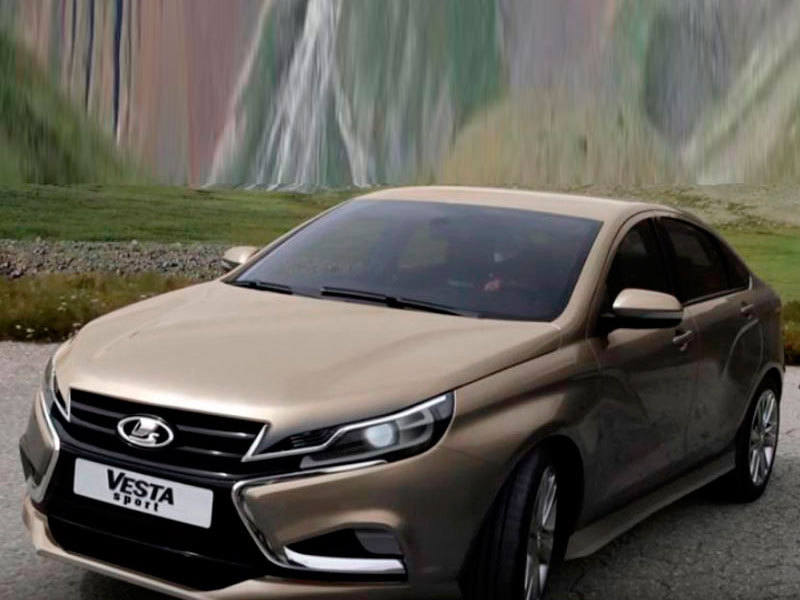

In [ ]:
name = '105191_800.jpg'
img = image.load_img(name , target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

max1 = 0
max2 = 0
max3 = 0
cla1 = 0
cla2 = 0
cla3 = 0
for i in range(196):
    if preds[0, i] > max1:
        max3 = max2
        max2 = max1
        max1 = preds[0, i]
        cla3 = cla2
        cla2 = cla1
        cla1 = i + 1

if cla2 == 0:
    cla2 = cla3 = cla1
if cla3 == 0:
    cla3 = cla2

print('Результат распознавания:', car_name_train[cla1], car_name_train[cla2], car_name_train[cla3])
print()
Image(name)